In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
data = pd.read_csv('/content/Airline_Delay_Cause.csv')

In [ ]:
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [ ]:
data = data.drop(['carrier','carrier_name','airport','airport_name'],axis=1)
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317268 entries, 0 to 318016
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317268 non-null  int64  
 1   month                317268 non-null  int64  
 2   arr_flights          317268 non-null  float64
 3   arr_del15            317268 non-null  float64
 4   carrier_ct           317268 non-null  float64
 5   weather_ct           317268 non-null  float64
 6   nas_ct               317268 non-null  float64
 7   security_ct          317268 non-null  float64
 8   late_aircraft_ct     317268 non-null  float64
 9   arr_cancelled        317268 non-null  float64
 10  arr_diverted         317268 non-null  float64
 11  arr_delay            317268 non-null  float64
 12  carrier_delay        317268 non-null  float64
 13  weather_delay        317268 non-null  float64
 14  nas_delay            317268 non-null  float64
 15  security_delay   

In [ ]:
data['weather_delay'].min(),data['weather_delay'].max()

(0.0, 57707.0)

In [ ]:
data['WDCase'] = data['weather_delay'].apply(lambda x : 1 if x >100 else 0)

In [ ]:
data['WDCase'].value_counts()

0    215116
1    102152
Name: WDCase, dtype: int64

In [ ]:
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,WDCase
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0,1
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0,1
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0,0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0,0


In [ ]:
X = data.drop(['WDCase'],axis = 1)
y =data['WDCase']

In [ ]:
X

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
318012    1
318013    1
318014    0
318015    0
318016    1
Name: WDCase, Length: 317268, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (237951, 17)
X_test shape is  (79317, 17)
y_train shape is  (237951,)
y_test shape is  (79317,)


In [ ]:
import tensorflow as tf
import keras

In [ ]:
KerasModel = keras.models.Sequential([
            # keras.layers.Input(shape=(17)),
            keras.layers.Dense(8,  activation = 'tanh'),
            # keras.layers.Dropout(0.1),
            keras.layers.Dense(128, activation = 'tanh'),
            
            # keras.layers.Dropout(0.3),
            keras.layers.Dense(64, activation = 'tanh'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(1, activation = 'sigmoid'),
            ])

In [ ]:
MyOptimizer = tf.keras.optimizers.experimental.AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="AdamW")


KerasModel.compile(optimizer =MyOptimizer,loss='binary_crossentropy',metrics=['accuracy'])

# regression : mse , mse
# BC : binary_crossentropy , accuracy
# MC : categorical_crossentropy , accuracy

In [ ]:
history = KerasModel.fit(X_train,y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])

Epoch 1/100
24/24 [==============================] - 2s 51ms/step - loss: 0.5116 - accuracy: 0.7440 - val_loss: 0.4527 - val_accuracy: 0.8090
Epoch 2/100
24/24 [==============================] - 2s 72ms/step - loss: 0.4408 - accuracy: 0.8159 - val_loss: 0.4332 - val_accuracy: 0.8176
Epoch 3/100
24/24 [==============================] - 1s 45ms/step - loss: 0.4308 - accuracy: 0.8212 - val_loss: 0.4260 - val_accuracy: 0.8208
Epoch 4/100
24/24 [==============================] - 1s 45ms/step - loss: 0.4231 - accuracy: 0.8246 - val_loss: 0.4197 - val_accuracy: 0.8227
Epoch 5/100
24/24 [==============================] - 1s 43ms/step - loss: 0.4157 - accuracy: 0.8254 - val_loss: 0.4119 - val_accuracy: 0.8226
Epoch 6/100
24/24 [==============================] - 1s 45ms/step - loss: 0.4071 - accuracy: 0.8243 - val_loss: 0.4024 - val_accuracy: 0.8234
Epoch 7/100
24/24 [==============================] - 1s 41ms/step - loss: 0.3979 - accuracy: 0.8251 - val_loss: 0.3919 - val_accuracy: 0.8253
Epoch 

In [ ]:
print(KerasModel.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 8)                 144       
                                                                 
 dense_21 (Dense)            (None, 128)               1152      
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,617
Trainable params: 9,617
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
KerasModel.save('KerasModel.model')

In [ ]:
NewKerasModel = keras.models.load_model('KerasModel.model')

In [ ]:
%%time
for i in range(1000000) : 
  i+=1

CPU times: user 176 ms, sys: 742 µs, total: 176 ms
Wall time: 274 ms


In [ ]:
X_test

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
256596,2007,1,213.0,64.0,16.33,3.44,15.06,0.00,29.17,13.0,0.0,3840.0,912.0,292.0,720.0,0.0,1916.0
6930,2022,1,617.0,82.0,29.69,2.04,26.88,0.30,23.08,27.0,1.0,5410.0,2471.0,157.0,1095.0,15.0,1672.0
125951,2014,11,62.0,8.0,3.00,0.00,2.09,0.00,2.91,0.0,0.0,609.0,391.0,0.0,123.0,0.0,95.0
87817,2017,10,82.0,9.0,6.00,1.20,1.00,0.00,0.80,0.0,0.0,260.0,201.0,22.0,17.0,0.0,20.0
42037,2020,3,168.0,12.0,6.65,2.00,1.04,0.00,2.31,19.0,0.0,558.0,331.0,73.0,43.0,0.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132929,2014,5,2410.0,637.0,222.01,9.35,56.16,0.85,348.62,13.0,0.0,34346.0,9518.0,842.0,2427.0,38.0,21521.0
251541,2007,4,42.0,8.0,5.83,0.00,1.50,0.00,0.67,1.0,0.0,306.0,234.0,0.0,58.0,0.0,14.0
84057,2018,1,80.0,12.0,3.48,3.92,0.12,0.00,4.48,2.0,0.0,1060.0,97.0,721.0,13.0,0.0,229.0
32889,2020,10,356.0,23.0,8.12,0.00,10.33,0.00,4.56,0.0,2.0,989.0,516.0,0.0,260.0,0.0,213.0


In [ ]:
y_pred = NewKerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))
print('Prediction items are {}'.format(y_pred[:5]))

2479/2479 [==============================] - 4s 2ms/step
Prediction Shape is (79317, 1)
Prediction items are [[9.9904090e-01]
 [9.9904090e-01]
 [5.6451088e-04]
 [3.0585707e-04]
 [2.0987899e-03]]


In [ ]:
ModelLoss, ModelAccuracy = NewKerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))

2479/2479 [==============================] - 5s 2ms/step - loss: 0.0209 - accuracy: 0.9958
Model Loss is 0.020861605182290077
Model Accuracy is 0.9958269000053406


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
history.history['accuracy']

[0.7439683079719543,
 0.8158864378929138,
 0.8212447166442871,
 0.8245605230331421,
 0.825354814529419,
 0.8242663145065308,
 0.8250942230224609,
 0.8289437890052795,
 0.8393955230712891,
 0.849082350730896,
 0.860580563545227,
 0.8758693933486938,
 0.8986471891403198,
 0.9404162764549255,
 0.9653962254524231,
 0.980693519115448,
 0.9941668510437012,
 0.9961757063865662,
 0.9944820404052734,
 0.9910191297531128,
 0.996604323387146,
 0.997096061706543,
 0.9967682361602783,
 0.9966001510620117,
 0.9977894425392151,
 0.9979113340377808,
 0.9979365468025208,
 0.998558521270752,
 0.9984114170074463,
 0.9980500340461731,
 0.9975709319114685,
 0.9978693127632141,
 0.9985039234161377,
 0.9980416297912598,
 0.9984156489372253,
 0.9972389340400696,
 0.9983904361724854,
 0.9978777170181274,
 0.9981382489204407,
 0.9986677765846252,
 0.9978650808334351,
 0.9971801042556763,
 0.9982937574386597,
 0.9988653063774109,
 0.998688817024231,
 0.9964026212692261,
 0.9977684617042542,
 0.9988400936126709,


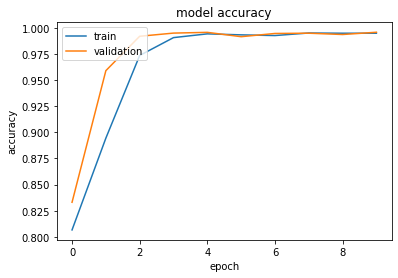

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
history.history['loss']

[0.5116039514541626,
 0.44078361988067627,
 0.43078088760375977,
 0.42309609055519104,
 0.4156970679759979,
 0.40713220834732056,
 0.39786505699157715,
 0.38768982887268066,
 0.3765810430049896,
 0.3610842525959015,
 0.32734543085098267,
 0.28969940543174744,
 0.25590068101882935,
 0.1730884462594986,
 0.10482380539178848,
 0.07285360991954803,
 0.0277392715215683,
 0.017433883622288704,
 0.025865551084280014,
 0.039912834763526917,
 0.01563834771513939,
 0.01326404046267271,
 0.014613167382776737,
 0.014900166541337967,
 0.009913844987750053,
 0.009284968487918377,
 0.009330002591013908,
 0.006132463458925486,
 0.006836334243416786,
 0.0087543660774827,
 0.010618632659316063,
 0.009352765046060085,
 0.006671925541013479,
 0.008633350022137165,
 0.006725102663040161,
 0.012556936591863632,
 0.006677869241684675,
 0.00963774137198925,
 0.008252205327153206,
 0.005447158124297857,
 0.009248228743672371,
 0.013316445052623749,
 0.00736831733956933,
 0.004938899539411068,
 0.00541973626241

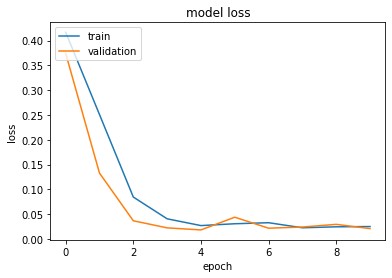

In [ ]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
len(y_test), len(y_pred)

(79317, 79317)

In [ ]:
y_pred

array([[0.9912413 ],
       [0.99688673],
       [0.00108864],
       ...,
       [0.9934505 ],
       [0.00108864],
       [0.02509036]], dtype=float32)

In [ ]:
y_pred = [np.round(i[0]) for i in y_pred]
y_pred

[1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[53555   169]
 [  109 25484]]


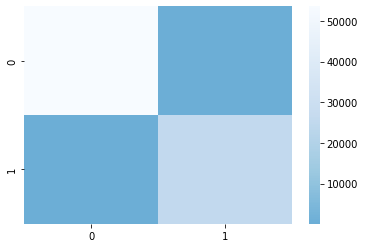

In [ ]:
# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53724
           1       0.99      1.00      0.99     25593

    accuracy                           1.00     79317
   macro avg       1.00      1.00      1.00     79317
weighted avg       1.00      1.00      1.00     79317



In [ ]:
data['weather_delay'].min(),data['weather_delay'].max()

(0.0, 57707.0)

In [ ]:
def Value(x) : 
  if x <=30 : 
    return 0
  elif x <= 100 : 
    return 1
  elif x <= 200 : 
    return 2
  else : 
    return 3


data['WDCase'] = data['weather_delay'].apply(lambda x : Value(x))

In [ ]:
data['WDCase'].value_counts()

0    164988
3     68251
1     50128
2     33901
Name: WDCase, dtype: int64

In [ ]:
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,WDCase
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,1
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0,2
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0,2
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0,0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0,0


In [ ]:
X = data.drop(['WDCase'],axis = 1)
y =data['WDCase']

In [ ]:
X

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [ ]:
y

0         0
1         0
2         0
3         1
4         0
         ..
318012    2
318013    2
318014    0
318015    0
318016    3
Name: WDCase, Length: 317268, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (237951, 17)
X_test shape is  (79317, 17)
y_train shape is  (237951,)
y_test shape is  (79317,)


In [ ]:
KerasModel = keras.models.Sequential([
        # keras.layers.Input(shape=(17,)),
        keras.layers.Dense(8,  activation = 'tanh'),
        keras.layers.Dense(128, activation = 'tanh'),
        keras.layers.Dense(64, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation = 'softmax'),
        ])

In [ ]:
KerasModel.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = KerasModel.fit(X_train,
                         y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=5,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])

Epoch 1/100


ValueError: ignored

In [ ]:
y_cat = tf.keras.utils.to_categorical(y)
y[:20]


0     0
1     0
2     0
3     1
4     0
5     1
6     3
7     0
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    0
18    0
19    1
20    0
21    0
Name: WDCase, dtype: int64

In [ ]:
y_cat[:20]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)


X_train shape is  (237951, 17)
X_test shape is  (79317, 17)
y_train shape is  (237951, 4)
y_test shape is  (79317, 4)


In [ ]:
y_train

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [ ]:
KerasModel = keras.models.Sequential([
        # keras.layers.Input(shape=(17,)),
        keras.layers.Dense(8,  activation = 'tanh'),
        keras.layers.Dense(128, activation = 'tanh'),
        keras.layers.Dense(64, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation = 'softmax'),
        ])

In [ ]:
KerasModel.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = KerasModel.fit(X_train,
                         y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=5,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])

Epoch 1/100
24/24 [==============================] - 2s 54ms/step - loss: 1.1141 - accuracy: 0.5596 - val_loss: 1.0293 - val_accuracy: 0.6077
Epoch 2/100
24/24 [==============================] - 1s 44ms/step - loss: 1.0292 - accuracy: 0.6149 - val_loss: 1.0091 - val_accuracy: 0.6207
Epoch 3/100
24/24 [==============================] - 1s 45ms/step - loss: 1.0006 - accuracy: 0.6284 - val_loss: 0.9820 - val_accuracy: 0.6296
Epoch 4/100
24/24 [==============================] - 1s 48ms/step - loss: 0.9763 - accuracy: 0.6320 - val_loss: 0.9643 - val_accuracy: 0.6313
Epoch 5/100
24/24 [==============================] - 2s 82ms/step - loss: 0.9617 - accuracy: 0.6341 - val_loss: 0.9524 - val_accuracy: 0.6326
Epoch 6/100
24/24 [==============================] - 2s 72ms/step - loss: 0.9496 - accuracy: 0.6349 - val_loss: 0.9409 - val_accuracy: 0.6392
Epoch 7/100
24/24 [==============================] - 1s 48ms/step - loss: 0.9381 - accuracy: 0.6468 - val_loss: 0.9308 - val_accuracy: 0.6503
Epoch 

In [ ]:
print(KerasModel.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 8)                 144       
                                                                 
 dense_17 (Dense)            (None, 128)               1152      
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 4)                 260       
                                                                 
Total params: 9,812
Trainable params: 9,812
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
KerasModel.save('KerasModel.model')

In [ ]:
NewKerasModel = keras.models.load_model('KerasModel.model')

In [ ]:
y_pred = NewKerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))
print('Prediction items are {}'.format(y_pred[:5]))

2479/2479 [==============================] - 4s 2ms/step
Prediction Shape is (79317, 4)
Prediction items are [[1.0611396e-07 6.9118170e-05 6.5578809e-03 9.9337292e-01]
 [2.9645197e-04 3.2819800e-02 8.6428386e-01 1.0259986e-01]
 [9.9965239e-01 3.4473502e-04 2.8686839e-06 1.5546895e-08]
 [9.9965239e-01 3.4473502e-04 2.8686839e-06 1.5546895e-08]
 [2.8910218e-03 9.9336106e-01 3.7223448e-03 2.5539663e-05]]


In [ ]:
y_pred[:10]

array([[1.0611396e-07, 6.9118170e-05, 6.5578809e-03, 9.9337292e-01],
       [2.9645197e-04, 3.2819800e-02, 8.6428386e-01, 1.0259986e-01],
       [9.9965239e-01, 3.4473502e-04, 2.8686839e-06, 1.5546895e-08],
       [9.9965239e-01, 3.4473502e-04, 2.8686839e-06, 1.5546895e-08],
       [2.8910218e-03, 9.9336106e-01, 3.7223448e-03, 2.5539663e-05],
       [9.9737674e-01, 2.6067875e-03, 1.6285281e-05, 9.0468696e-08],
       [1.0611396e-07, 6.9118170e-05, 6.5578809e-03, 9.9337292e-01],
       [3.0251971e-07, 9.1097354e-05, 6.1201677e-03, 9.9378842e-01],
       [9.9965239e-01, 3.4473502e-04, 2.8686839e-06, 1.5546895e-08],
       [9.9965239e-01, 3.4473502e-04, 2.8686839e-06, 1.5546895e-08]],
      dtype=float32)

In [ ]:
ModelLoss, ModelAccuracy = NewKerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))

2479/2479 [==============================] - 4s 2ms/step - loss: 0.0359 - accuracy: 0.9920
Model Loss is 0.03590952605009079
Model Accuracy is 0.9920193552970886


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


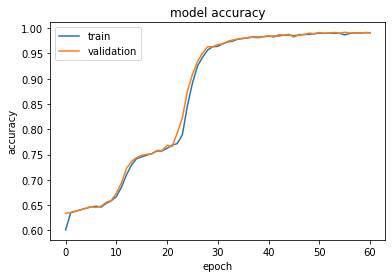

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

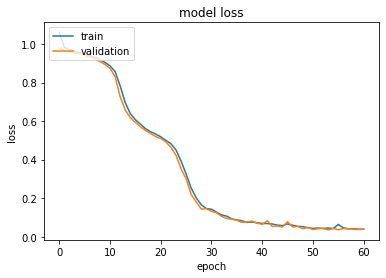

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
len(y_test), len(y_pred)

(79317, 79317)

In [ ]:
# 1,5,0,1,2,3,5,1
# 1,4,0,1,3,2

In [ ]:
y_pred

array([[1.0611396e-07, 6.9118170e-05, 6.5578809e-03, 9.9337292e-01],
       [2.9645197e-04, 3.2819800e-02, 8.6428386e-01, 1.0259986e-01],
       [9.9965239e-01, 3.4473502e-04, 2.8686839e-06, 1.5546895e-08],
       ...,
       [1.2175076e-07, 7.9944431e-05, 1.1482099e-02, 9.8843783e-01],
       [9.9965239e-01, 3.4473519e-04, 2.8686839e-06, 1.5546926e-08],
       [1.7783258e-02, 9.2105806e-01, 6.0614668e-02, 5.4407940e-04]],
      dtype=float32)

In [ ]:
y_test

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
new_y_pred = [np.argmax(i) for i in y_pred]
new_y_test = [np.argmax(i) for i in y_test]
print(new_y_pred[:30])
print(new_y_test[:30])

[3, 2, 0, 0, 1, 0, 3, 3, 0, 0, 3, 0, 0, 1, 2, 1, 3, 2, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0]
[3, 2, 0, 0, 1, 0, 3, 3, 0, 0, 3, 0, 0, 1, 2, 1, 3, 2, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
CM = confusion_matrix(new_y_test, new_y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[40988   117     0     0]
 [   47 12372   200     0]
 [    0   130  8440    17]
 [    0     0   122 16884]]


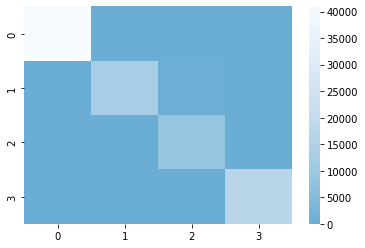

In [ ]:
# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(new_y_test,new_y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41105
           1       0.98      0.98      0.98     12619
           2       0.96      0.98      0.97      8587
           3       1.00      0.99      1.00     17006

    accuracy                           0.99     79317
   macro avg       0.99      0.99      0.99     79317
weighted avg       0.99      0.99      0.99     79317



In [ ]:
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,WDCase
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,1
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0,2
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0,2
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0,0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0,0


In [ ]:
X = data.drop(['arr_flights'],axis = 1)
y =data['arr_flights']

In [ ]:
X

,year,month,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,WDCase
0,2022,5,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,1
4,2022,5,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0,2
318013,2003,6,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0,2
318014,2003,6,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0,0
318015,2003,6,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0,0


In [ ]:
y

0          136.0
1           91.0
2           19.0
3           88.0
4          181.0
           ...  
318012     480.0
318013     505.0
318014     146.0
318015      95.0
318016    3466.0
Name: arr_flights, Length: 317268, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (237951, 17)
X_test shape is  (79317, 17)
y_train shape is  (237951,)
y_test shape is  (79317,)


In [ ]:
KerasModel = keras.models.Sequential([
        # keras.layers.Input(shape=(17,)),
        keras.layers.Dense(8,  activation = 'tanh'),
        keras.layers.Dense(128, activation = 'tanh'),
        keras.layers.Dense(64, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation = 'linear'),
        ])

In [ ]:
KerasModel.compile(optimizer ='adam',loss='mse',metrics=['mse'])

In [ ]:
history = KerasModel.fit(X_train,
                         y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=5,
                                            monitor='val_loss',
                                            restore_best_weights=True)])

Epoch 1/100
24/24 [==============================] - 2s 77ms/step - loss: 1185524.1250 - mse: 1185524.1250 - val_loss: 1219426.6250 - val_mse: 1219426.6250
Epoch 2/100
24/24 [==============================] - 1s 58ms/step - loss: 1183409.0000 - mse: 1183409.0000 - val_loss: 1217777.3750 - val_mse: 1217777.3750
Epoch 3/100
24/24 [==============================] - 2s 72ms/step - loss: 1181914.5000 - mse: 1181914.5000 - val_loss: 1216382.6250 - val_mse: 1216382.6250
Epoch 4/100
24/24 [==============================] - 2s 80ms/step - loss: 1180575.3750 - mse: 1180575.3750 - val_loss: 1215078.1250 - val_mse: 1215078.1250
Epoch 5/100
24/24 [==============================] - 1s 54ms/step - loss: 1179299.0000 - mse: 1179299.0000 - val_loss: 1213822.7500 - val_mse: 1213822.7500
Epoch 6/100
24/24 [==============================] - 1s 43ms/step - loss: 1178065.1250 - mse: 1178065.0000 - val_loss: 1212598.7500 - val_mse: 1212598.7500
Epoch 7/100
24/24 [==============================] - 1s 44ms/ste

In [ ]:
print(KerasModel.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 8)                 144       
                                                                 
 dense_25 (Dense)            (None, 128)               1152      
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,617
Trainable params: 9,617
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))
print('Prediction items are {}'.format(y_pred[:5]))

2479/2479 [==============================] - 5s 2ms/step
Prediction Shape is (79317, 1)
Prediction items are [[158.9473 ]
 [158.9473 ]
 [102.63158]
 [ 42.61204]
 [102.63158]]


In [ ]:
y_pred[:10]

array([[158.9473 ],
       [158.9473 ],
       [102.63158],
       [ 42.61204],
       [102.63158],
       [158.9473 ],
       [158.9473 ],
       [158.9473 ],
       [ 42.61204],
       [102.63158]], dtype=float32)

In [ ]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))

2479/2479 [==============================] - 12s 5ms/step - loss: 1127499.5000 - mse: 1127499.5000
Model Loss is 1127499.5
Model Accuracy is 1127499.5


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


In [ ]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

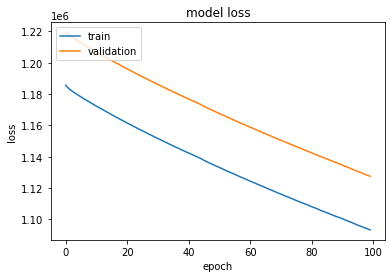

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
len(y_test), len(y_pred)

(79317, 79317)

In [ ]:
y_pred

array([[158.9473 ],
       [158.9473 ],
       [102.63158],
       ...,
       [ 77.00296],
       [158.60149],
       [158.94731]], dtype=float32)

In [ ]:
y_test

256596     213.0
6930       617.0
125951      62.0
87817       82.0
42037      168.0
           ...  
132929    2410.0
251541      42.0
84057       80.0
32889      356.0
269836    1075.0
Name: arr_flights, Length: 79317, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error , median_absolute_error,r2_score

print('Mean Absolute Error Value is : ', mean_absolute_error(y_test, y_pred) )
print('Mean Squared Error Value is : ', mean_squared_error(y_test, y_pred))
print('Median Absolute Error Value is : ', median_absolute_error(y_test, y_pred))
print('R2 Squared Value is : ', r2_score(y_test, y_pred))

Mean Absolute Error Value is :  299.16735231118736
Mean Squared Error Value is :  1127498.8069275552
Median Absolute Error Value is :  45.39851379394531
R2 Squared Value is :  -0.04276810971758649


In [ ]:
# Import Libraries
from sklearn.neural_network import MLPClassifier
#----------------------------------------------------

#----------------------------------------------------
#Applying MLPClassifier Model 

'''
sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu’, solver=’adam’,
                                     alpha=0.0001,batch_size='auto’, learning_rate=’constant’,momentum=0.9,
                                     learning_rate_init=0.001, power_t=0.5,max_iter=200, shuffle=True,
                                     random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                                     n_iter_no_change=10, nesterovs_momentum=True,early_stopping=False, 
                                     validation_fraction=0.1,beta_1=0.9, beta_2=0.999, epsilon=1E-08,)
'''

MLPClassifierModel = MLPClassifier(activation='tanh', # can be also identity , logistic , relu
                                   solver='lbfgs',  # can be also sgd , adam
                                   learning_rate='constant', # can be also invscaling , adaptive
                                   early_stopping= False,
                                   alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)
MLPClassifierModel.fit(X_train, y_train)

#Calculating Details
#print('MLPClassifierModel Train Score is : ' , MLPClassifierModel.score(X_train, y_train))
#print('MLPClassifierModel Test Score is : ' , MLPClassifierModel.score(X_test, y_test))
#print('MLPClassifierModel loss is : ' , MLPClassifierModel.loss_)
#print('MLPClassifierModel No. of iterations is : ' , MLPClassifierModel.n_iter_)
#print('MLPClassifierModel No. of layers is : ' , MLPClassifierModel.n_layers_)
#print('MLPClassifierModel last activation is : ' , MLPClassifierModel.out_activation_)
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = MLPClassifierModel.predict(X_test)
y_pred_prob = MLPClassifierModel.predict_proba(X_test)
#print('Predicted Value for MLPClassifierModel is : ' , y_pred[:10])
#print('Prediction Probabilities Value for MLPClassifierModel is : ' , y_pred_prob[:10])